In [3]:
#importing necessary libraries (I prefer to do them all at the start)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, accuracy_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
#loading Extraalearn data file
el=pd.read_csv("C:\\Users\\rober\\Documents\\Data Science\\Code (all)\\Portfolio\\MIT completed projects\\Datasets\\ExtraaLearn.csv")

In [5]:
el.duplicated().sum()

np.int64(0)

In [6]:
#checking file info, shape, etc.
el.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [7]:
el.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [8]:
el.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**OBSERVATIONS**

No missing values.

ID column can be dropped as it only identifies each individual person and will thus mess up our analysis.

In [9]:
#dropping ID column as stated above
el=el.drop(['ID'], axis=1)

In [10]:
#separating numerical and categorical values

In [11]:
# Creating numerical columns
num_cols=['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status'] #kept status so it's included in the heatmap later

# Creating categorical variables
cat_cols= ['profile_completed', 'current_occupation', 'last_activity', 'first_interaction', 'print_media_type1',
           'print_media_type2', 'digital_media', 'educational_channels', 'referral']

In [12]:
#checking statistics of continuous categories
el[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [13]:
#checking ratio of paid to unpaid customers
el.status.value_counts(normalize=True)

status
0    0.701431
1    0.298569
Name: proportion, dtype: float64

**OBSERVATIONS**

Average age is 46 years old.

Average number of website visits is about 3-4.

Average time spent on the website is 12 minutes.

29.9% paid customers.

70.1% unpaid.

In [14]:
# Printing the % sub categories of the discrete categories
for i in cat_cols:
    print(el[i].value_counts(normalize=True))
    print('-'*30)

profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
------------------------------
current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
------------------------------
educational_channels
No     0.847138
Yes    0.152862
Name: proportion, dty

Will visualize the discrete categories shortly.

In [15]:
el.head(5)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [16]:
el.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

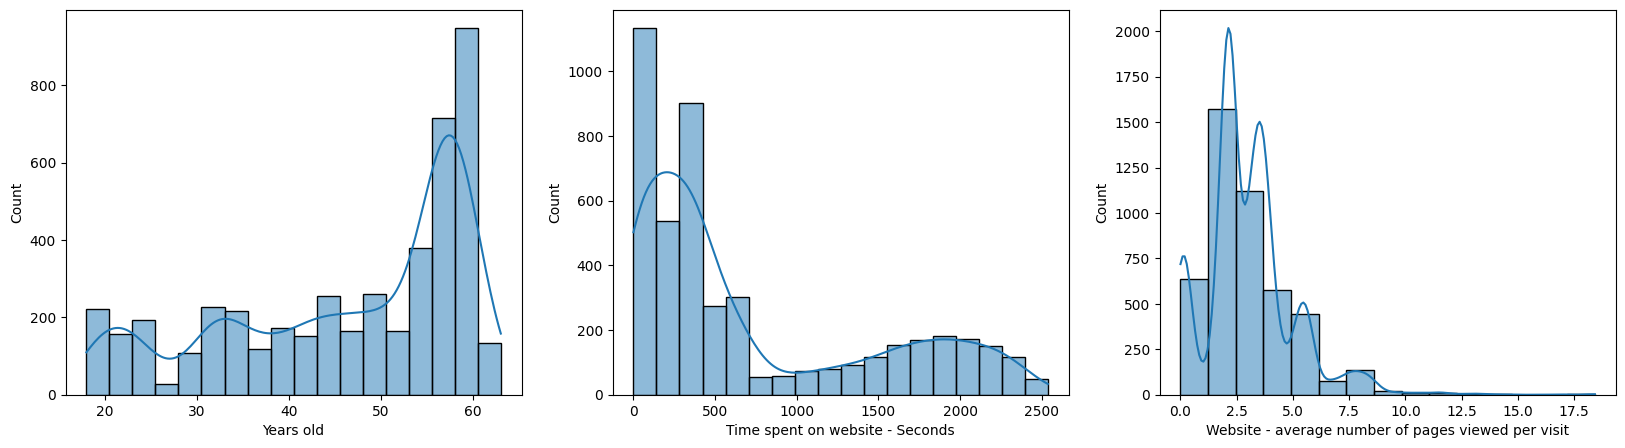

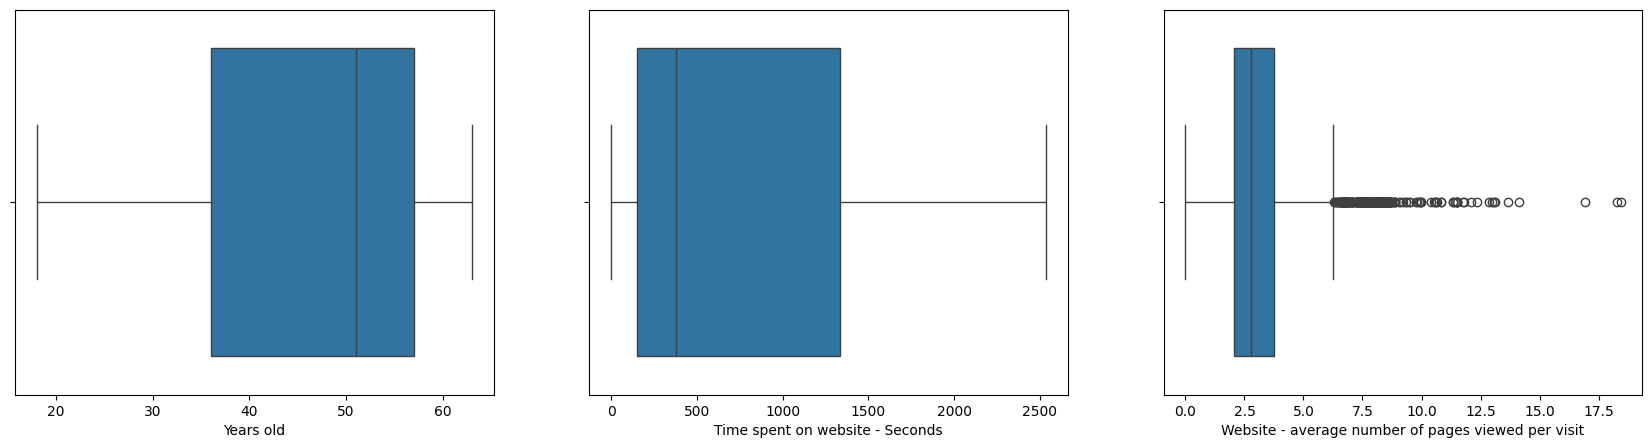

In [17]:
#visualizing continuous data categories
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(data=el, x='age', kde=True)
plt.xlabel('Years old')
plt.subplot(1,3,2)
plt.xlabel('Time spent on website - Seconds')
sns.histplot(data=el, x='time_spent_on_website', kde=True)
plt.subplot(1,3,3)
plt.xlabel('Website - average number of pages viewed per visit')
sns.histplot(data=el, x='page_views_per_visit', bins=15, kde=True)


plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
plt.xlabel('Years old')
sns.boxplot(data=el, x='age')
plt.subplot(1,3,2)
sns.boxplot(data=el, x='time_spent_on_website')
plt.xlabel('Time spent on website - Seconds')
plt.subplot(1,3,3)
sns.boxplot(data=el, x='page_views_per_visit')
plt.xlabel('Website - average number of pages viewed per visit')
plt.show()

**OBSERVATIONS**

Age skews to the left, with the majority of customers between 35-57 years old.

Time spent on the website skews to the right, with a gradual spike to longer sessions. Interestingly, there is a huge window of time most people spend on the site, between 2.5 to 22 minutes. Either they know quickly they're not interested, or they'll take the time to do research before making a decision and/or filling out the necessary forms to become a paid customer.

**As required by the assignment, visualizing the categorical data categories.**

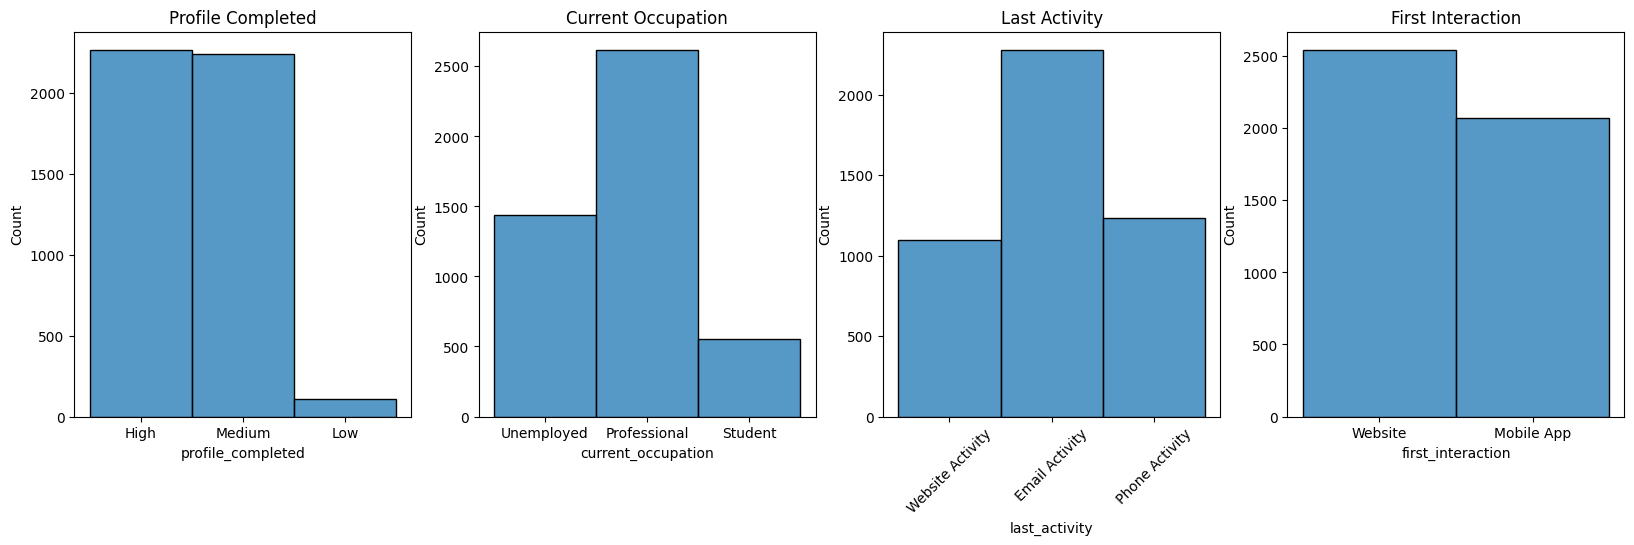

In [18]:
#visualizing discrete data categories

plt.figure(figsize=((20,5)))
plt.subplot(1,4,1)
plt.title("Profile Completed")
sns.histplot(data=el, x='profile_completed')

plt.subplot(1,4,2)
plt.title("Current Occupation")
sns.histplot(data=el, x='current_occupation')

plt.subplot(1,4,3)
plt.title("Last Activity")
sns.histplot(data=el, x='last_activity')
plt.xticks(rotation=45)

plt.subplot(1,4,4)
plt.title("First Interaction")
sns.histplot(data=el, x='first_interaction')
plt.show()

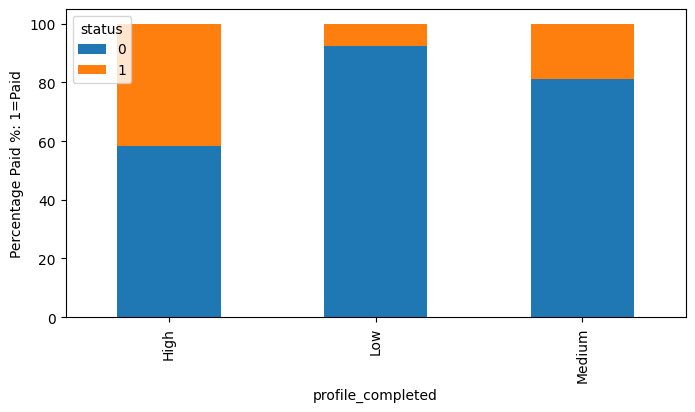

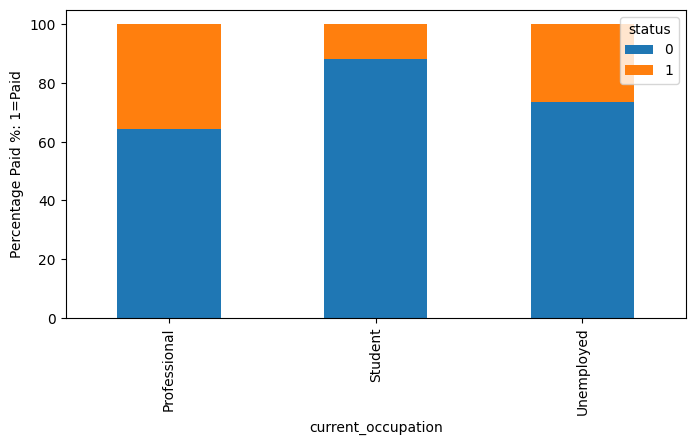

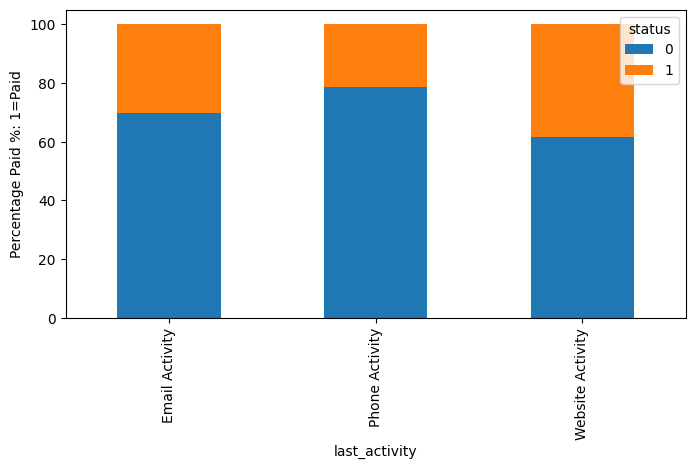

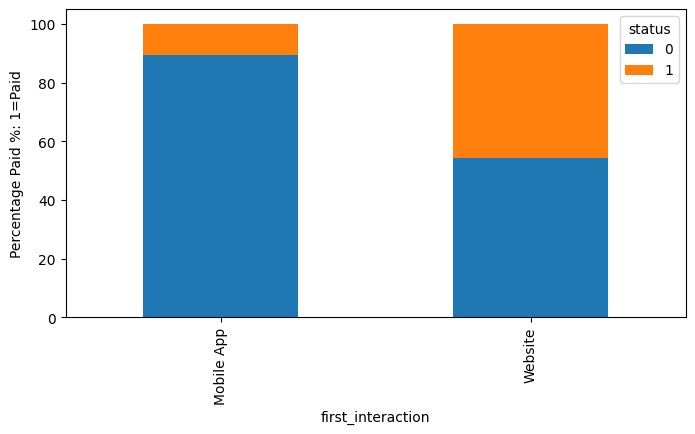

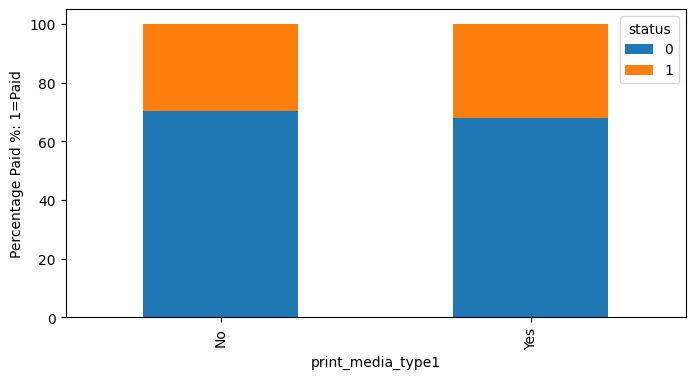

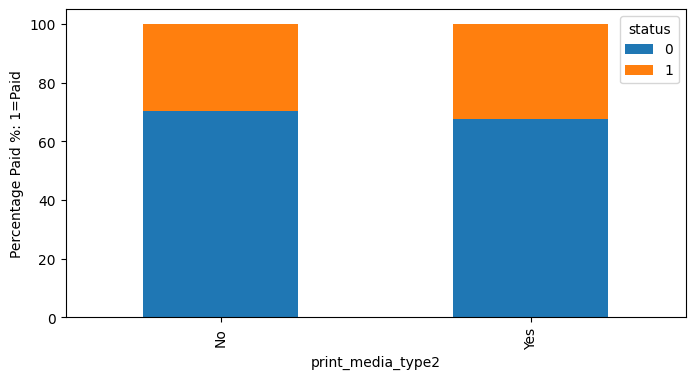

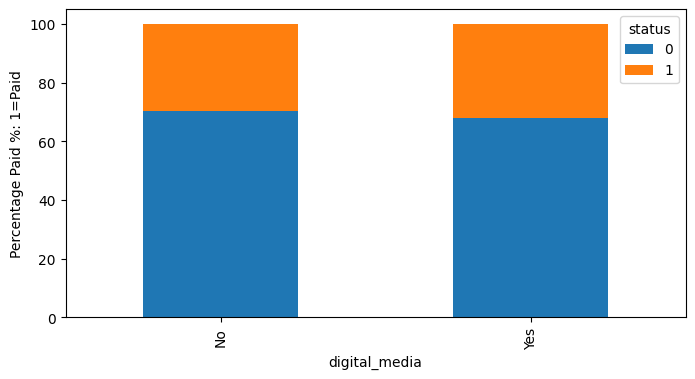

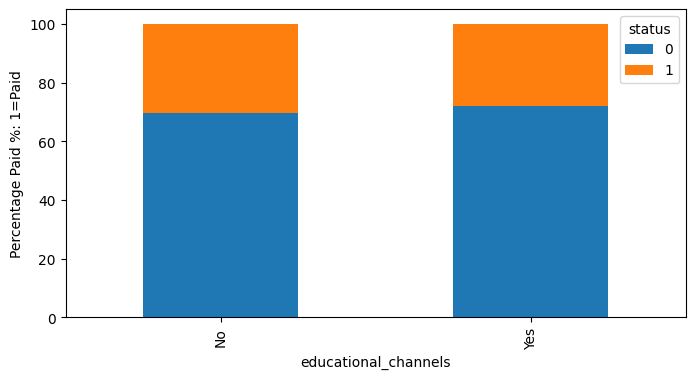

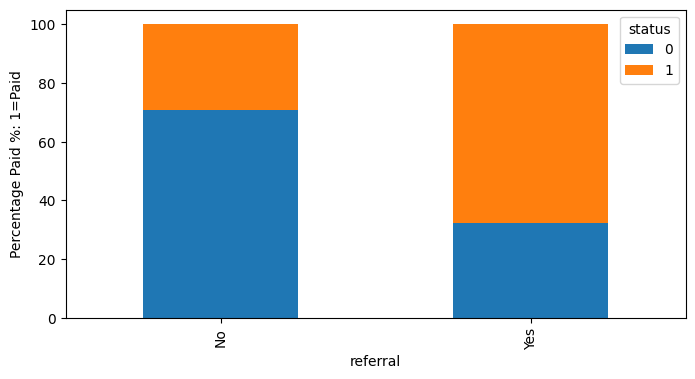

In [20]:
#showing ratio of paid customers to individual discrete columns
for i in cat_cols:
    if i!='status':
        (pd.crosstab(el[i],el['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4), stacked=True)
        plt.ylabel('Percentage Paid %: 1=Paid')

**OBSERVATIONS**

Almost all customers will take the time to complete at least half of their profile. Finding ways to have more high completions could help with conversions to paid customers.

Most customers are employed; however, a good amount are unemployed, meaning there might still be opportunity to convert the unemployed into paid customers.

Half of customers most recently engaged via email.

Interestingly, phone activity and website activity are about even.

First interactions with ExtraaLearn were mostly via the mobile app. First interactions with the website acquired way more paid customers than via the mobile app.

There are about 30% of paid customers via print media (newspapers and magazines), digital media, and educational channels.

Word of mouth (referrals) is still a great way to acquire more paid customers.



In [21]:
# Mean of numerical variables grouped by status
el.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
status,,,,,
0,45.153014,3.578980,577.420711,3.025732,0.0
1,48.663762,3.538126,1068.397967,3.027050,1.0


**OBSERVATIONS**

Paid customers on average spend a little less than twice the amount of time on the website, meaning they'll take the time to do the research and/or fill out their profile and enter their payment info to become a paid customer. We've found out something about paid customers, but not enough for definitive conclusions.

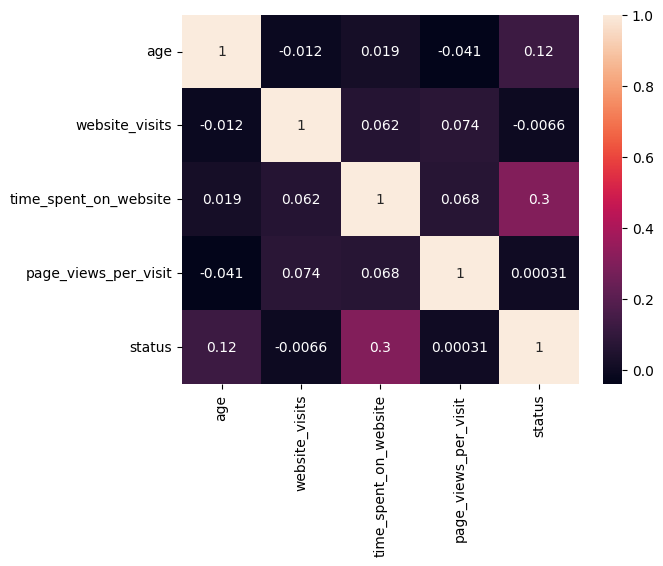

In [22]:
#Creating a heatmap for the numbered columns to status
el_corr=el[num_cols].corr()
sns.heatmap(el_corr, annot=True)
plt.show()

**HEATMAP OBSERVATIONS**

Status correlates highest with age and time spent on website. Of course, correlation does not equal causation, so more analysis is needed.